## 2-layer NN : XOR Problem

In [ ]:
import torch 
import torch.nn as nn
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Step 1. Data -  target : 0, 1 binary

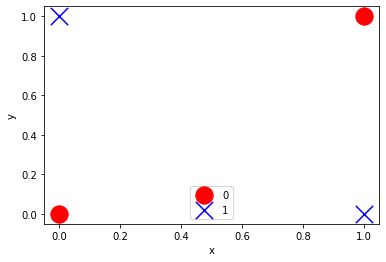

In [ ]:
x_data = torch.FloatTensor([[0., 0.],
          [0., 1.],
          [1., 0.],
          [1., 1.]])
y_data = torch.FloatTensor([[0.],
          [1.],
          [1.],
          [0.]])

plt.scatter(x_data[0, 0], x_data[0, 1], s=300, color='red', marker='o', label='0')
plt.scatter(x_data[3, 0], x_data[3, 1], s=300, color='red', marker='o')
plt.scatter(x_data[1, 0], x_data[1, 1], s=300, color='blue', marker='x', label='1')
plt.scatter(x_data[2, 0], x_data[2, 1], s=300, color='blue', marker='x')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower center')
plt.show()

### Step 2. 2-Layer NN Model (input = 2, hidden1 = 4, output = 1 with softmax function)

In [ ]:
class MultilayerPerceptron(torch.nn.Module):
    def __init__(self):
        super(MultilayerPerceptron,self).__init__()
        self.model = nn.Sequential(
          nn.Linear(2,4),
          nn.ReLU(),
          nn.Linear(4,1),
          nn.Sigmoid()
        )
    def forward(self,x):
        y_pred = self.model(x)
        return y_pred

model = MultilayerPerceptron()

### Step 3. Loss and Optimizer

In [ ]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

### Step 4. Train the model

In [ ]:
epochs = 1000
cost = []
acc = []
for epoch in range(epochs):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)

    prediction = y_pred >= torch.FloatTensor([0.5])
    correct_prediction = prediction.float() == y_data
    accuracy = correct_prediction.sum().item() / len(correct_prediction)

    cost.append(loss.item())
    acc.append(accuracy)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
      
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, epochs, loss.item(), accuracy * 100))

Epoch    0/1000 Cost: 0.724504 Accuracy 50.00%
Epoch  100/1000 Cost: 0.638208 Accuracy 75.00%
Epoch  200/1000 Cost: 0.561411 Accuracy 75.00%
Epoch  300/1000 Cost: 0.493403 Accuracy 75.00%
Epoch  400/1000 Cost: 0.394853 Accuracy 100.00%
Epoch  500/1000 Cost: 0.237093 Accuracy 100.00%
Epoch  600/1000 Cost: 0.140138 Accuracy 100.00%
Epoch  700/1000 Cost: 0.093146 Accuracy 100.00%
Epoch  800/1000 Cost: 0.067397 Accuracy 100.00%
Epoch  900/1000 Cost: 0.052591 Accuracy 100.00%


Print the updated weight W and bias b

In [ ]:
for param in model.parameters():
  print(param)

Parameter containing:
tensor([[-1.6493, -1.6496],
        [ 0.3060, -0.2367],
        [ 1.9468,  1.9472],
        [-1.1516, -1.1523]], requires_grad=True)
Parameter containing:
tensor([ 1.6464, -0.3095, -1.9434,  1.1481], requires_grad=True)
Parameter containing:
tensor([[-2.6996, -0.2206, -3.3286, -1.9024]], requires_grad=True)
Parameter containing:
tensor([2.7446], requires_grad=True)


Plot the Training Loss

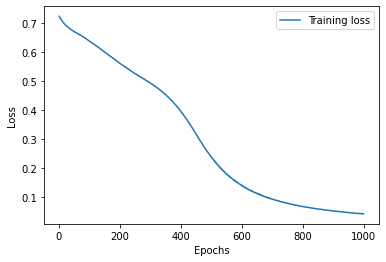

In [ ]:
epochs = np.arange(1, epochs+1)
plt.plot(epochs, cost, label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plot the Training Acc

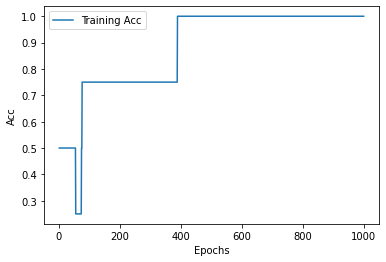

In [ ]:
plt.plot(epochs, acc, label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

### Step 5. Test

In [ ]:
with torch.no_grad():
  y_pred = model(x_data)  # predicted output

prediction = y_pred >= torch.FloatTensor([0.5])
print(x_data)
print(prediction.float())

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
tensor([[0.],
        [1.],
        [1.],
        [0.]])


### Plot the Decision Boundary

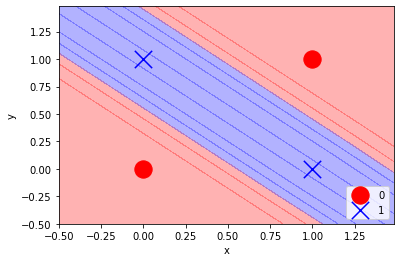

In [ ]:
plt.scatter(x_data[0, 0], x_data[0, 1], s=300, color='red', marker='o', label='0')
plt.scatter(x_data[3, 0], x_data[3, 1], s=300, color='red', marker='o')
plt.scatter(x_data[1, 0], x_data[1, 1], s=300, color='blue', marker='x', label='1')
plt.scatter(x_data[2, 0], x_data[2, 1], s=300, color='blue', marker='x')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')

resolution=0.02
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:2])
x1_min, x1_max = x_data[:, 0].min() - 0.5, x_data[:, 0].max() + 0.5
x2_min, x2_max = x_data[:, 1].min() - 0.5, x_data[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

x_test = torch.FloatTensor([xx1.ravel(), xx2.ravel()]).transpose(0, 1)
with torch.no_grad():
  y_pred = model(x_test)  # predicted output

Z = y_pred.view(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

plt.show()